# Comprimir datos mediante reduccion de dimensionalidad

En esta parte veremos algunos algoritmos utiles  para la reduccionde la dimensionalidad, pero no por seleccion de caracteristicas, como se hizo durante la semana pasada usando el SBS, bosque aleatorios o regularizacion l1, sino por extraccion de caracteristicas, lo cual consiste en la creacion de nuevas caracteristicas informativas a partir del conjunto de caracteristicas existentes. Manejaremos el primer enfoque, pero recomiendo revisar los otros dos:

1. **Analisis de compenentes principales (PCA)**: Compresion de datos sin supervision.
2. **Analisis de discriimnante lineal (ADL)**: Reduccion de dimensionalidad supervisada para maximizar la divisibilidad de clases.
3. **Analisis de componentes principales con kernels (ACPK)**: Reduccion de dimensionalidad no lineal.

## Analisis de componentes principales

La idea de los algoritmos de compresion como este es reducir la dimensionalidad conservando la mayor parte de informacion importante. Este tipo de practicas no solo se utiliza para mejorar el espacio de almacenamiento o incrementar la eficiencia computacional, sino que tambien pueden mejorar el rendimiento predictivo al ser capaces de reducir el sobreajuste.

## Pasos escenciales del PCA

El **PCA** es una tecnica de transformacion lineal sin supervision muy utilizada en diferentes campos, sobretodo para extraccion de caracteristicas y reduccion de dimensionalidad. 

El PCA nos ayuda a identificar patrones en datos basados en la correlacion entre caracteristicas. En pocas palabras, el PCA ayuda a encontrar las direcciones de varianza maxima en datos de alta dimesion y los proyecta en un nuevo subespacio con dimensiones iguales o menores que el original. Los _componentes principales_ (ejes ortogonales) del nuevo subespacio se pueden interpretar como las direcciones de la varianza maxima dada la restriccion de que los nuevos ejes de caracteristicas sean ortogonales entre si:

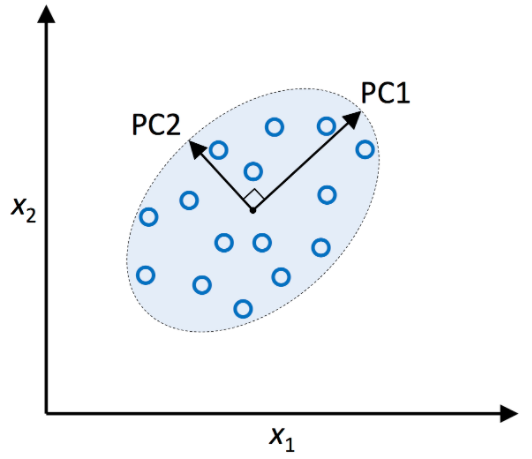

Parte del proceso es la construccion de una matriz $\textbf{W}$ de transformacion de $d \times k$ dimensiones que nos permite mapear un vector $\textbf{x}$ de muestra en un subespacio de caracteristicas de $k$ dimensiones con menos dimensiones que el espacio original de $d$ dimensiones:

$$\textbf{x}=[x_1,x_2,x_3,\dots,x_d],\; x \in\mathbb R^d$$

$$\downarrow \textbf{xW},\;\textbf{W}\in \mathbb R^{d \times k}$$

$$\textbf{x}'=[z_1,z_2,z_3,\dots,z_k],\;z\in\mathbb R^{k}$$

Como resultado de esta transformacion en este espacio de $k$ dimensiones (usualmente $k<<d$), el primer componente tendra la mayor varianza posible, y todos los demas componentes deben tener la maxima varianza posible con la restriccion de que no esten correlacionados entre si (que sean ortogonales entre si), aun cuando las caracteristicas originales esten correlacionadas en cualquier grado.

<span class="burk">IMPORTANTE</span>:  El metodo **PCA** es muy sensible al escalado de datos, por lo tanto es importante estandarizar las caracteristicas antes de aplicar PCA.

**Pasos para la ejecucion de PCA:**
1. Estandarizar el conjunto de datos de  $d$ dimensiones.
2. Construir la matriz de covarianza.
3. Descomponer la matriz de covarianza en sus autovectores y sus autovalores.
4. Ordenar los autovalores por orden decreciente para clasificar los correspondientes autovectores.
5. Seleccionar $k$ autovectores que correspondan a los $k$ autovalores mayores, donde $k$ es la dimensionalidad del nuevo subespacio de caracteristicas ($k\leq d$).
6. Construir una matriz de proyeccion $\textbf{W}$ a partir de los $k$ autovectores "top".
7. Transformar el conjunto de datos de entrada $\textbf{X}$ de $d$ dimensiones para obtener el nuevo subespacio de caracteristicas de $k$ dimensiones.

## Extracion de los componentes principales paso a paso

Cuatro primeros pasos: 
1. Estandarizar el conjunto de datos de  $d$ dimensiones.
2. Construir la matriz de covarianza.
3. Descomponer la matriz de covarianza en sus autovectores y sus autovalores.
4. Ordenar los autovalores por orden decreciente para clasificar los correspondientes autovectores.

In [1]:
# Conjunto de datos wine
# ================================================
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


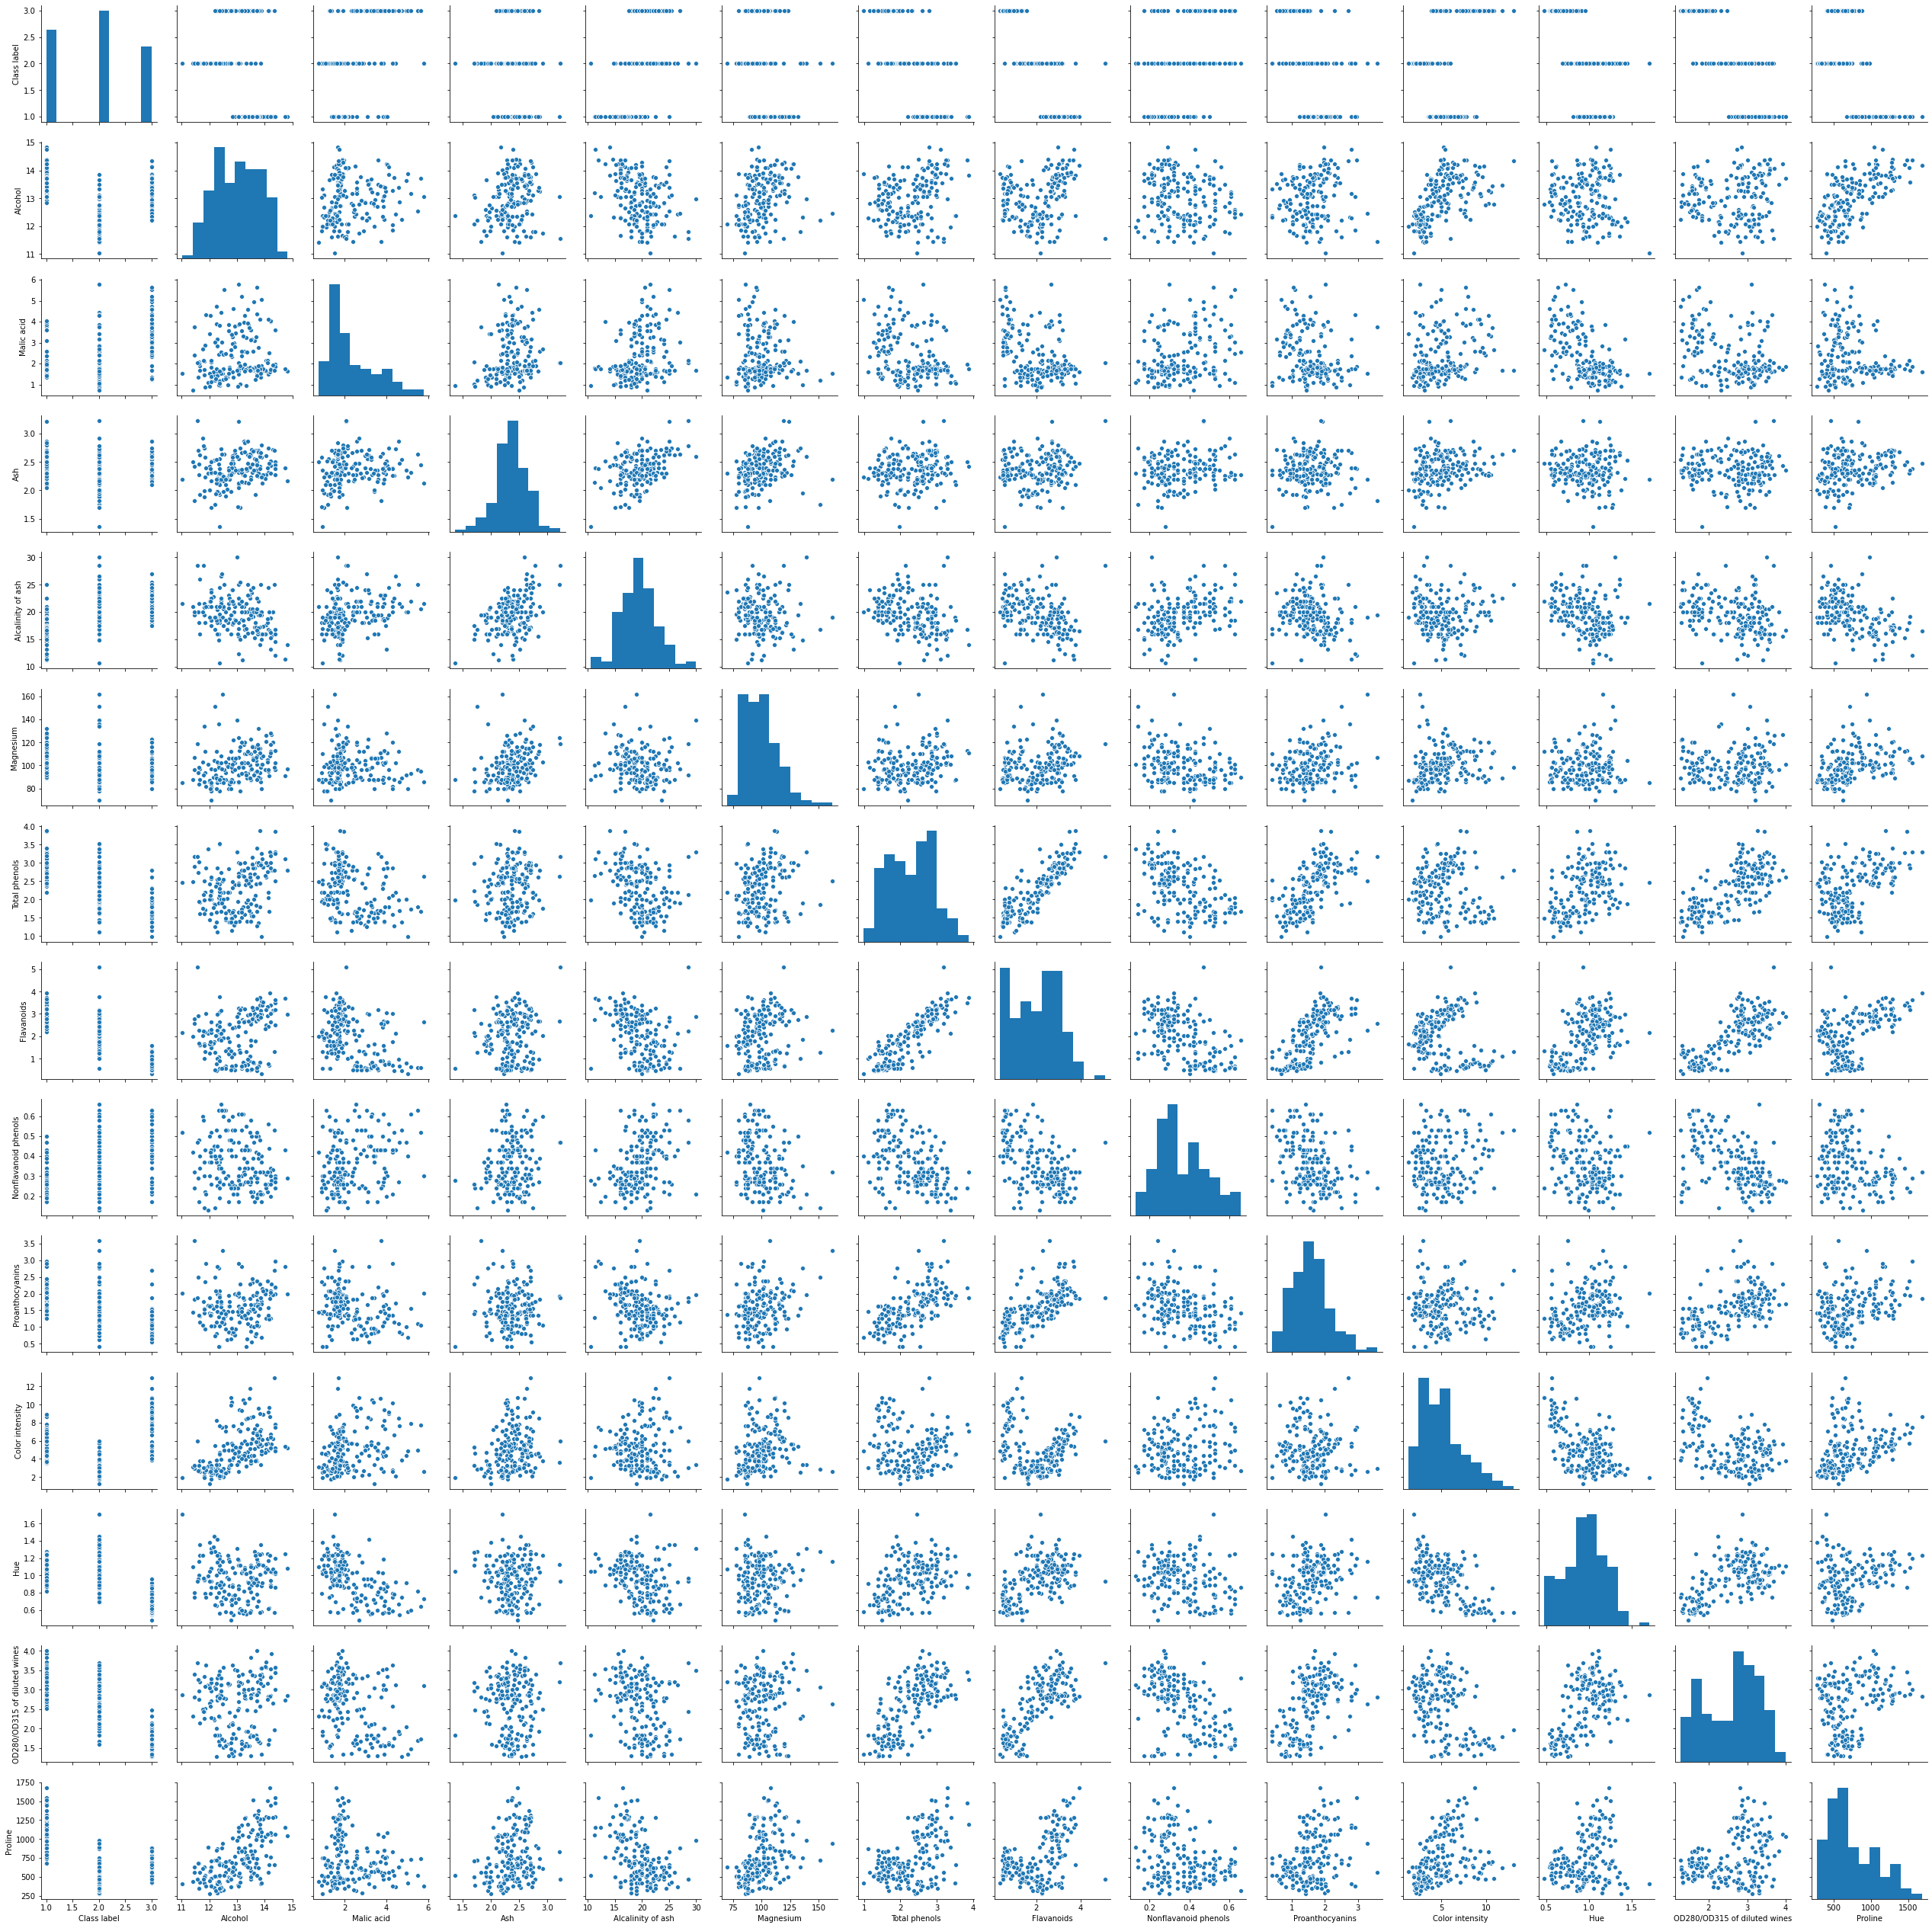

In [5]:
import seaborn as sns
sns.pairplot(df_wine)

In [2]:
# Division de datos en entrenamiento y test
# ================================================
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, stratify=y)

In [3]:
# Estandarizacion de los datos
# ================================================
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

El siguiente paso es la construccion de la matriz de covarianzas. En wikipedia tenemos que:

_En probabilidad y estadística, la covarianza es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias. Es el dato básico para determinar si existe una dependencia entre ambas variables y además es el dato necesario para estimar otros parámetros básicos, como el coeficiente de correlación lineal o la recta de regresión._

Matriz de covarianzas:

$$\Sigma = \begin{equation}
\begin{bmatrix}
\sigma_1^2 & \sigma_{12} & \sigma_{13}\\
\sigma_{21} & \sigma_{2}^2 & \sigma_{23}\\
\sigma_{31} & \sigma_{32} & \sigma_{3}^2
\end{bmatrix}
\end{equation}$$

Los **autovectores** de la matriz de covarianza representan los componentes principales (las direcciones de varianza maxima), mientras que los correspondientes **autovalores** definiran su magnitud. Para el conjunto de datos _Wine_ , obtendriamos 13 autovectores y autovalores de la matriz de covarianza 13 x 13 dimensiones.

Paso 3: Descomponer la matriz de covarianza en sus autovectores y sus autovectores. Los eigenvectores vienen en columnas:

In [7]:
# Calculo de la matriz de covarianzas y sus correspondientes autovalores y autovectores
# ================================================
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)

print(f'\nEigenvalores:\n {eigen_vals}', end = '\n\n')
print(f'\nPrimer Eigenvector:\n {eigen_vecs[0]}', end = '\n\n')


Eigenvalores:
 [0.08190543 0.16017832 0.2332034  0.2418205  0.28384299 0.36111937
 0.58231067 0.66419409 0.7578107  1.03905624 1.33014595 2.57272778
 4.7973756 ]


Primer Eigenvector:
 [ 0.02363577 -0.3315964  -0.33785658  0.12351316  0.07449514  0.58824108
  0.24947948 -0.22398107  0.00352658 -0.1036158   0.18723478  0.47145684
 -0.16739445]



### Varianza total y explicada

Para la compresion de datos, solo seleccionaremos el conjunto de autovectores que mas informacion aporte, es decir, aquellos con autovalores mas grandes, pues poseen mayor varianza. Para poder conocer cuanto aportan los autovectores a la informacion de la varianza, se puede realizar un grafico de varianza explicada, el cual se basa en los valores de los autovalores. Para poder realizar el grafico, necesitamos la siguiente informacion:

$$\frac{\lambda_j}{\sum_{j=1}^d \lambda_j}$$

para cada autovalor.

In [8]:
# Calculo de las varianzas explicada individuales
# ================================================

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

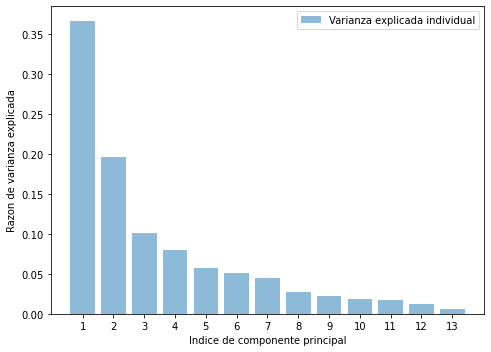

In [9]:
# Grafica de las varianzas explicada individuales
# ================================================

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (7, 5))

ax.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='Varianza explicada individual')

ax.set_ylabel('Razon de varianza explicada')
ax.set_xlabel('Indice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
ax.set_xticks(np.arange(1,14));

## Transformacion de caracteristicas

Vamos a realizar los ultimos tres pasos del algoritmo:
5. Seleccionar $k$ autovectores que correspondan a los $k$ autovalores mayores, donde $k$ es la dimensionalidad del nuevo subespacio de caracteristicas ($k\leq d$).
6. Construir una matriz de proyeccion $\textbf{W}$ a partir de los $k$ autovectores "top".
7. Transformar el conjunto de datos de entrada $\textbf{X}$ de $d$ dimensiones para obtener el nuevo subespacio de caracteristicas de $k$ dimensiones.

In [10]:
# Ordenamiento de los eigenvalores y eigenvectores en forma decreciente
# ======================================================================

#Hacer una lista de  (eigenvalor, eigenvector)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Ordenamiento en forma decreciente
eigen_pairs.sort(key = lambda k: k[0], reverse = True)

In [11]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],  eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.16739445  0.47145684]
 [ 0.23827008  0.18754983]
 [-0.01865922  0.30485765]
 [ 0.24716137 -0.06615898]
 [-0.16078605  0.33996969]
 [-0.40470551  0.02727498]
 [-0.43135366 -0.04881181]
 [ 0.27970612  0.01090448]
 [-0.30958948 -0.03604038]
 [ 0.06849523  0.52378129]
 [-0.28606113 -0.26181276]
 [-0.36053383 -0.22886518]
 [-0.29576428  0.36033673]]


Ahora podemos transformar nuestra matriz de caracteristicas $\textbf{X}$ al nuevo espacio de caracteristicas $\textbf{X}'$:

$$\textbf{X}' = \textbf{X}\textbf{W}$$

In [12]:
# Transformando la matriz de caracteristicas original a la generada por los componentes principales
# ======================================================================
X_train_pca = X_train_std.dot(w)

Inclusive podemos transformar caracteristicas individuales:

$$\textbf{x}' = \textbf{x}\textbf{W}$$

In [13]:
# OTransformando un valor de l conjunto original al conjunto nuevo
# ======================================================================
X_train_std[0].dot(w)

array([-0.81981569, -1.82026305])

In [14]:
X_train_pca[:5]

array([[-0.81981569, -1.82026305],
       [-1.70129385, -0.41424316],
       [ 2.94476496,  1.67226405],
       [-3.45833517,  0.92563928],
       [-2.18429579,  1.16937041]])

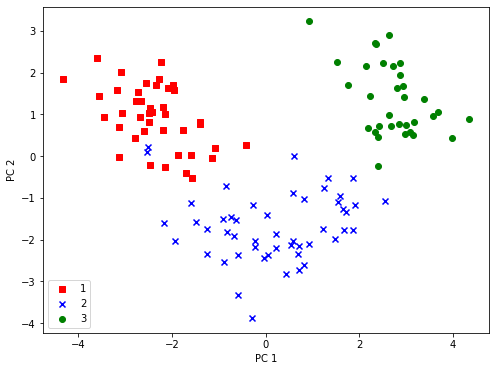

In [15]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

fig, ax = plt.subplots(figsize = (8, 6))
for l, c, m in zip(np.unique(y_train), colors, markers):
    ax.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c=c, label=l, marker=m)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend(loc='lower left')

<div class="burk">
EJERCICIO
</div><i class="fa fa-lightbulb-o "></i>

1. Utilice el archivo `abalone.data`, importelo y analicelo. No olvide leer el archivo `abalone.names` para obtener informacion del nombre de las columnas. En este caso la columna de clase es la columna `sex`. Grafique. Realice una clasificacion usando maquinas de soporte vectorial y una reduccion de dimensionalidad a dos componentes principales. Evalue el rendimiento. Si el rendimiento es muy bajo, aumente el numero de componentes principales. Si se presenta sobreajuste, considere realizar regularizacion tipo `l2`. 

In [72]:
# Conjunto de datos
# ================================================
import pandas as pd

df = pd.read_csv('abalone.data', header=None)

df.columns = ['Sex', 'Length', 'Diameter', 'Height',
                   'Whole weight', 'Shucked weight', 'Viscera weight',
                   'Shell weight', 'Rings']

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [73]:
# Division de datos en entrenamiento y test
# ================================================
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, stratify=y)

In [74]:
y

array(['M', 'M', 'F', ..., 'M', 'F', 'M'], dtype=object)

In [75]:
# Estandarizacion de los datos
# ================================================
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [76]:
# Calculo de la matriz de covarianzas y sus correspondientes autovalores y autovectores
# ================================================
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)

print(f'\nEigenvalores:\n {eigen_vals}', end = '\n\n')
print(f'\nPrimer Eigenvector:\n {eigen_vecs[0]}', end = '\n\n')


Eigenvalores:
 [5.52003574e-03 1.33925623e-02 6.72229290e-02 8.47152417e-02
 1.68371894e-01 3.04219660e-01 6.95499003e-01 6.66379652e+00]


Primer Eigenvector:
 [ 0.01767584 -0.70086461  0.03637281 -0.00591809 -0.60149895  0.03451525
  0.06853854 -0.3734013 ]



In [77]:
# Calculo de las varianzas explicada individuales
# ================================================

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]

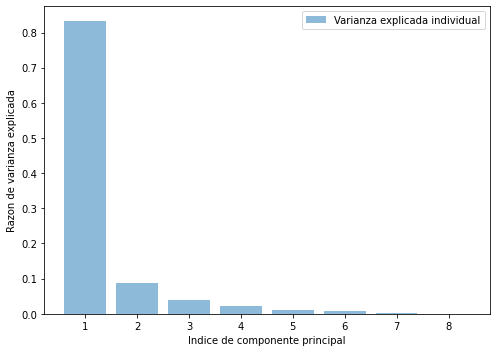

In [78]:
# Grafica de las varianzas explicada individuales
# ================================================

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (7, 5))

ax.bar(range(1, 9), var_exp, alpha=0.5, align='center', label='Varianza explicada individual')

ax.set_ylabel('Razon de varianza explicada')
ax.set_xlabel('Indice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
ax.set_xticks(np.arange(1,9));

In [79]:
# Ordenamiento de los eigenvalores y eigenvectores en forma decreciente
# ======================================================================

#Hacer una lista de  (eigenvalor, eigenvector)
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Ordenamiento en forma decreciente
eigen_pairs.sort(key = lambda k: k[0], reverse = True)

In [80]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],  eigen_pairs[1][1][:, np.newaxis], eigen_pairs[2][1][:, np.newaxis]))
print('Matrix W:\n', w)

#Datos mas dispersos hacia una direccion dada por la primera columna. Son 8 dimensiones

Matrix W:
 [[-0.3734013   0.06853854  0.03451525]
 [-0.37421073  0.0445256   0.0222534 ]
 [-0.33140182 -0.06138678 -0.92731777]
 [-0.37980574  0.13556229  0.17495158]
 [-0.36393692  0.29299395  0.17620444]
 [-0.36993395  0.16563126  0.16793921]
 [-0.37205074 -0.04597309  0.14049644]
 [-0.24235359 -0.92508474  0.16969486]]


In [81]:
# Transformando la matriz de caracteristicas original a la generada por los componentes principales
# ======================================================================
X_train_pca = X_train_std.dot(w)
#.dot mult por w nueva matiriz 2 dimensiones. Producto punto o producto matricial

In [82]:
# OTransformando un valor de l conjunto original al conjunto nuevo
# ======================================================================
X_train_std[0].dot(w)

array([ 0.29223265, -0.08846065,  0.10661355])

In [83]:
X_train_pca[:5]
#mismas filas pero solo 2 columnas las que eliges con el PCA

array([[ 0.29223265, -0.08846065,  0.10661355],
       [-2.09101399,  0.37010956, -0.46840544],
       [ 3.74029796,  0.38782442,  0.28456142],
       [ 4.00489755,  0.33528573,  0.32289038],
       [ 3.84476834,  0.2690112 , -0.22286834]])

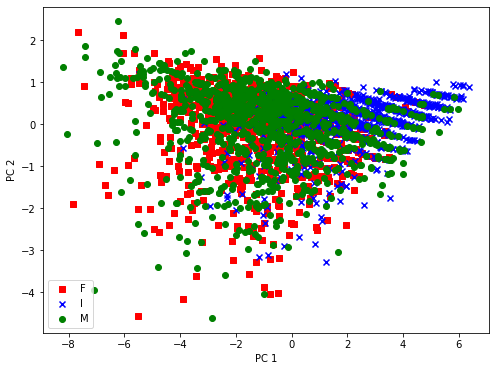

In [84]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

fig, ax = plt.subplots(figsize = (8, 6))
for l, c, m in zip(np.unique(y_train), colors, markers):
    ax.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c=c, label=l, marker=m)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend(loc='lower left')

## PCA usando sklearn

<span class="burk">EJERCICIO</span>

Repita el ejercicio anterior utilizando las librerias de  sklearn. Grafique la clasificacion y evalue el rendimiento de los conjunto de entrenamiento y prueba. Intnte utilizar dos clasificadores para evaluar dos rendimientos diferentes. Mas adelante veremos como realizar la validacion cruzada de varios estimadores a la vez para elegir el mas adecuado,

In [85]:
# Funcion de graficacion de regiones de decision
# =========================================================
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

In [86]:
X_train_std.shape

(2923, 8)

In [113]:
# Aplicando PCA y clasificando con regresion logistica
# ===============================================================
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

In [114]:
from sklearn.metrics import accuracy_score
y_pred1 = lr.predict(X_train_pca)
y_pred2 = lr.predict(X_test_pca)
print(f'Rendimiento en el conjunto de entrenamieto: {accuracy_score(y_train, y_pred1)}')
print(f'Rendimiento en el conjunto de prueba: {accuracy_score(y_test, y_pred2)}')

Rendimiento en el conjunto de entrenamieto: 0.5340403694834075
Rendimiento en el conjunto de prueba: 0.5542264752791068


Si se desea conocer la relacion de varianzas explicadas, simplemente se puede inicializar el metodo PCA con `n_components = None` y acceder a ellas usando `explained_variance_ratio_`:

In [99]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([8.32689593e-01, 8.69076329e-02, 3.80144478e-02, 2.10392865e-02,
       1.05857824e-02, 8.39999138e-03, 1.67349757e-03, 6.89768407e-04])